# Clustering the songs and building the song recommender

In [71]:
import pandas as pd
import numpy as np
from credentials import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias # 
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret_id))

In [72]:
df1 = pd.read_csv('top_100_all_features.csv')
df1.shape
df1

,Unnamed: 0.1,Unnamed: 0,chart_no,song,artist,track_id,uri,href,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0,1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://open.spotify.com/track/59uQI0PADDKeE6U...,0.45900,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518
1,1,1,2,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,0.05210,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418
2,2,2,3,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://open.spotify.com/track/0yLdNVWF3Srea0u...,0.06320,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,0.646
3,3,3,4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://open.spotify.com/track/3dnP0JxCgygwQH9...,0.48300,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,0.834
4,4,4,5,Un x100to,Grupo Frontera X Bad Bunny,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.22800,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,0.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,96,It Matters To Her,Scotty McCreery,4aSRUXfKuBbmje0eXNukuL,spotify:track:4aSRUXfKuBbmje0eXNukuL,https://open.spotify.com/track/4aSRUXfKuBbmje0...,0.00528,0.516,0.752,0.000038,0.2510,-5.090,0.0333,105.007,0.482
96,96,96,97,Like Crazy,Jimin,0u8rZGtXJrLtiSe34FPjGG,spotify:track:0u8rZGtXJrLtiSe34FPjGG,https://open.spotify.com/track/0u8rZGtXJrLtiSe...,0.00306,0.623,0.755,0.000000,0.3870,-5.386,0.0415,119.957,0.320
97,97,97,98,All Of The Girls You Loved Before,Taylor Swift,4P9Q0GojKVXpRTJCaL3kyy,spotify:track:4P9Q0GojKVXpRTJCaL3kyy,https://open.spotify.com/track/4P9Q0GojKVXpRTJ...,0.70700,0.718,0.467,0.000069,0.1260,-9.660,0.0398,95.960,0.396
98,98,98,99,5 Leaf Clover,Luke Combs,2RbIoEQeXBoJzWt09eitEI,spotify:track:2RbIoEQeXBoJzWt09eitEI,https://open.spotify.com/track/2RbIoEQeXBoJzWt...,0.05540,0.423,0.580,0.000003,0.1680,-4.959,0.0243,82.755,0.336


In [73]:
df1.isna().sum()

Unnamed: 0.1        0
Unnamed: 0          0
chart_no            0
song                0
artist              0
track_id            0
uri                 0
href                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [74]:
def df1_clean(df):
    df=df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'chart_no'])
    df=df.rename(columns={'track_id':'id'})
    df=df.reindex(columns=['artist', 'song', 'id', 'uri','href', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence'])
    df['hot']= 1
    return df
df1_clean = df1_clean(df1) 
df1_clean

,artist,song,id,uri,href,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,hot
0,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://open.spotify.com/track/59uQI0PADDKeE6U...,0.45900,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518,1
1,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,0.05210,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418,1
2,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://open.spotify.com/track/0yLdNVWF3Srea0u...,0.06320,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,0.646,1
3,Eslabon Armado X Peso Pluma,Ella Baila Sola,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://open.spotify.com/track/3dnP0JxCgygwQH9...,0.48300,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,0.834,1
4,Grupo Frontera X Bad Bunny,Un x100to,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.22800,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,0.562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Scotty McCreery,It Matters To Her,4aSRUXfKuBbmje0eXNukuL,spotify:track:4aSRUXfKuBbmje0eXNukuL,https://open.spotify.com/track/4aSRUXfKuBbmje0...,0.00528,0.516,0.752,0.000038,0.2510,-5.090,0.0333,105.007,0.482,1
96,Jimin,Like Crazy,0u8rZGtXJrLtiSe34FPjGG,spotify:track:0u8rZGtXJrLtiSe34FPjGG,https://open.spotify.com/track/0u8rZGtXJrLtiSe...,0.00306,0.623,0.755,0.000000,0.3870,-5.386,0.0415,119.957,0.320,1
97,Taylor Swift,All Of The Girls You Loved Before,4P9Q0GojKVXpRTJCaL3kyy,spotify:track:4P9Q0GojKVXpRTJCaL3kyy,https://open.spotify.com/track/4P9Q0GojKVXpRTJ...,0.70700,0.718,0.467,0.000069,0.1260,-9.660,0.0398,95.960,0.396,1
98,Luke Combs,5 Leaf Clover,2RbIoEQeXBoJzWt09eitEI,spotify:track:2RbIoEQeXBoJzWt09eitEI,https://open.spotify.com/track/2RbIoEQeXBoJzWt...,0.05540,0.423,0.580,0.000003,0.1680,-4.959,0.0243,82.755,0.336,1


In [75]:
df2 = pd.read_csv('not_hot_all_features.csv')
df2.shape
df2

,Unnamed: 0.1,Unnamed: 0,artist,song,href,track_id,uri,audio_features,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,0,40179,Melaena Cadiz,Needles River,spotify:track:4TCcDD97LU6rBUnYhjGmR8,3DaFh4kJy4Ifo4cLjBjkXG,spotify:track:4TCcDD97LU6rBUnYhjGmR8,"{'danceability': 0.754, 'energy': 0.591, 'key'...",0.754,0.591,...,0.000000,0.1080,0.690,141.998,audio_features,4TCcDD97LU6rBUnYhjGmR8,https://api.spotify.com/v1/tracks/4TCcDD97LU6r...,https://api.spotify.com/v1/audio-analysis/4TCc...,204720.0,4.0
1,1,43011,johnny_ripper,sleep,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,86830,aaron yabrov,pendulum,spotify:track:7eJqLdEQ96D5Xzc406xkeZ,4Y2glvLjQGOb4dXnwm1hQf,spotify:track:4Y2glvLjQGOb4dXnwm1hQf,"{'danceability': 0.42, 'energy': 0.969, 'key':...",0.420,0.969,...,0.008610,0.3790,0.182,174.038,audio_features,4Y2glvLjQGOb4dXnwm1hQf,https://api.spotify.com/v1/tracks/4Y2glvLjQGOb...,https://api.spotify.com/v1/audio-analysis/4Y2g...,252787.0,4.0
3,3,43126,John Hyatt and M4SK 22,Frost on my Window,spotify:track:23EgnmfkdOsDK96ftbVv0Q,23EgnmfkdOsDK96ftbVv0Q,spotify:track:23EgnmfkdOsDK96ftbVv0Q,"{'danceability': 0.446, 'energy': 0.41, 'key':...",0.446,0.410,...,0.000000,0.1220,0.318,156.274,audio_features,23EgnmfkdOsDK96ftbVv0Q,https://api.spotify.com/v1/tracks/23EgnmfkdOsD...,https://api.spotify.com/v1/audio-analysis/23Eg...,245000.0,4.0
4,4,69127,LIL and Sin Senal,Uninstall,spotify:track:3pjvkWO9fqiRRBE1tDLu3S,3pjvkWO9fqiRRBE1tDLu3S,spotify:track:3pjvkWO9fqiRRBE1tDLu3S,"{'danceability': 0.822, 'energy': 0.851, 'key'...",0.822,0.851,...,0.007920,0.1050,0.749,117.992,audio_features,3pjvkWO9fqiRRBE1tDLu3S,https://api.spotify.com/v1/tracks/3pjvkWO9fqiR...,https://api.spotify.com/v1/audio-analysis/3pjv...,185085.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,105832,Sonic Avenues,Defective,spotify:track:2Y8g36KJKaidRuDvUGExMm,2Y8g36KJKaidRuDvUGExMm,spotify:track:2Y8g36KJKaidRuDvUGExMm,"{'danceability': 0.281, 'energy': 0.807, 'key'...",0.281,0.807,...,0.595000,0.0733,0.364,120.748,audio_features,2Y8g36KJKaidRuDvUGExMm,https://api.spotify.com/v1/tracks/2Y8g36KJKaid...,https://api.spotify.com/v1/audio-analysis/2Y8g...,187612.0,4.0
2996,2996,86745,Dirty Fences,White Lies,spotify:track:36qXB3unTCFECNtyMmdJTe,36qXB3unTCFECNtyMmdJTe,spotify:track:36qXB3unTCFECNtyMmdJTe,"{'danceability': 0.176, 'energy': 0.922, 'key'...",0.176,0.922,...,0.000045,0.4690,0.467,195.515,audio_features,36qXB3unTCFECNtyMmdJTe,https://api.spotify.com/v1/tracks/36qXB3unTCFE...,https://api.spotify.com/v1/audio-analysis/36qX...,148936.0,4.0
2997,2997,35556,Les Filles et les Garçons,I Sing Despair,spotify:track:3Cc0xsYtoaPDjVZyiPHiQ4,3Cc0xsYtoaPDjVZyiPHiQ4,spotify:track:3Cc0xsYtoaPDjVZyiPHiQ4,"{'danceability': 0.582, 'energy': 0.548, 'key'...",0.582,0.548,...,0.114000,0.0962,0.380,80.038,audio_features,3Cc0xsYtoaPDjVZyiPHiQ4,https://api.spotify.com/v1/tracks/3Cc0xsYtoaPD...,https://api.spotify.com/v1/audio-analysis/3Cc0...,196813.0,4.0
2998,2998,87269,Bennett / Bravo / Mehrl / Olivera / Taveira / ...,Descubrimiento del fuego,spotify:track:10q8owLYhNZDgINYus7gB1,10q8owLYhNZDgINYus7gB1,spotify:track:10q8owLYhNZDgINYus7gB1,"{'danceability': 0.522, 'energy': 0.856, 'key'...",0.522,0.856,...,0.033000,0.0862,0.531,124.965,audio_features,10q8owLYhNZDgINYus7gB1,https://api.spotify.com/v1/tracks/10q8owLYhNZD...,https://api.spotify.com/v1/audio-analysis/10q8...,193010.0,4.0


In [76]:
df2.isna().sum()

Unnamed: 0.1          0
Unnamed: 0            0
artist                0
song                  0
href                191
track_id            181
uri                 186
audio_features      186
danceability        186
energy              186
key                 186
loudness            186
mode                186
speechiness         186
acousticness        186
instrumentalness    186
liveness            186
valence             186
tempo               186
type                186
id                  186
track_href          186
analysis_url        186
duration_ms         186
time_signature      186
dtype: int64

In [77]:
def df2_clean(df):
    df=df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'track_id','audio_features','key','mode','type','analysis_url','duration_ms','time_signature'])
    df=df.reindex(columns=['artist', 'song', 'id','uri','href', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence'])
    df=df.dropna()
    df['hot']= 2
    return df
df2_clean = df2_clean(df2) 
df2_clean

,artist,song,id,uri,href,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,hot
0,Melaena Cadiz,Needles River,4TCcDD97LU6rBUnYhjGmR8,spotify:track:4TCcDD97LU6rBUnYhjGmR8,spotify:track:4TCcDD97LU6rBUnYhjGmR8,0.378000,0.754,0.591,0.000000,0.1080,-6.465,0.0566,141.998,0.690,2
2,aaron yabrov,pendulum,4Y2glvLjQGOb4dXnwm1hQf,spotify:track:4Y2glvLjQGOb4dXnwm1hQf,spotify:track:7eJqLdEQ96D5Xzc406xkeZ,0.000028,0.420,0.969,0.008610,0.3790,-3.139,0.0581,174.038,0.182,2
3,John Hyatt and M4SK 22,Frost on my Window,23EgnmfkdOsDK96ftbVv0Q,spotify:track:23EgnmfkdOsDK96ftbVv0Q,spotify:track:23EgnmfkdOsDK96ftbVv0Q,0.736000,0.446,0.410,0.000000,0.1220,-11.431,0.0289,156.274,0.318,2
4,LIL and Sin Senal,Uninstall,3pjvkWO9fqiRRBE1tDLu3S,spotify:track:3pjvkWO9fqiRRBE1tDLu3S,spotify:track:3pjvkWO9fqiRRBE1tDLu3S,0.333000,0.822,0.851,0.007920,0.1050,-3.314,0.0422,117.992,0.749,2
5,Loretta Kelley,"Sandsdalsgangaren, telegangar",3mM14WXoPaLRjjkmxHe99L,spotify:track:3mM14WXoPaLRjjkmxHe99L,spotify:track:3mM14WXoPaLRjjkmxHe99L,0.836000,0.604,0.354,0.004740,0.1030,-14.070,0.0313,137.349,0.635,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Sonic Avenues,Defective,2Y8g36KJKaidRuDvUGExMm,spotify:track:2Y8g36KJKaidRuDvUGExMm,spotify:track:2Y8g36KJKaidRuDvUGExMm,0.279000,0.281,0.807,0.595000,0.0733,-6.611,0.0457,120.748,0.364,2
2996,Dirty Fences,White Lies,36qXB3unTCFECNtyMmdJTe,spotify:track:36qXB3unTCFECNtyMmdJTe,spotify:track:36qXB3unTCFECNtyMmdJTe,0.363000,0.176,0.922,0.000045,0.4690,-4.107,0.2080,195.515,0.467,2
2997,Les Filles et les Garçons,I Sing Despair,3Cc0xsYtoaPDjVZyiPHiQ4,spotify:track:3Cc0xsYtoaPDjVZyiPHiQ4,spotify:track:3Cc0xsYtoaPDjVZyiPHiQ4,0.338000,0.582,0.548,0.114000,0.0962,-8.018,0.0462,80.038,0.380,2
2998,Bennett / Bravo / Mehrl / Olivera / Taveira / ...,Descubrimiento del fuego,10q8owLYhNZDgINYus7gB1,spotify:track:10q8owLYhNZDgINYus7gB1,spotify:track:10q8owLYhNZDgINYus7gB1,0.022100,0.522,0.856,0.033000,0.0862,-7.109,0.0598,124.965,0.531,2


In [78]:
display(df1_clean.columns)
display(df2_clean.columns)

Index(['artist', 'song', 'id', 'uri', 'href', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'hot'],
      dtype='object')

Index(['artist', 'song', 'id', 'uri', 'href', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'hot'],
      dtype='object')

In [79]:
df_all = pd.concat([df1_clean, df2_clean], axis=0)

In [80]:
df_all = df_all.reset_index()

In [81]:
df_all.to_csv('df_all.csv', index=False)

In [160]:
df_all = pd.read_csv('df_all.csv')
df_all.shape
df_all

,index,artist,song,id,uri,href,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,hot
0,0,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://open.spotify.com/track/59uQI0PADDKeE6U...,0.4590,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518,1
1,1,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,0.0521,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418,1
2,2,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://open.spotify.com/track/0yLdNVWF3Srea0u...,0.0632,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,0.646,1
3,3,Eslabon Armado X Peso Pluma,Ella Baila Sola,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://open.spotify.com/track/3dnP0JxCgygwQH9...,0.4830,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,0.834,1
4,4,Grupo Frontera X Bad Bunny,Un x100to,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.2280,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,0.562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2995,Sonic Avenues,Defective,2Y8g36KJKaidRuDvUGExMm,spotify:track:2Y8g36KJKaidRuDvUGExMm,spotify:track:2Y8g36KJKaidRuDvUGExMm,0.2790,0.281,0.807,0.595000,0.0733,-6.611,0.0457,120.748,0.364,2
2889,2996,Dirty Fences,White Lies,36qXB3unTCFECNtyMmdJTe,spotify:track:36qXB3unTCFECNtyMmdJTe,spotify:track:36qXB3unTCFECNtyMmdJTe,0.3630,0.176,0.922,0.000045,0.4690,-4.107,0.2080,195.515,0.467,2
2890,2997,Les Filles et les Garçons,I Sing Despair,3Cc0xsYtoaPDjVZyiPHiQ4,spotify:track:3Cc0xsYtoaPDjVZyiPHiQ4,spotify:track:3Cc0xsYtoaPDjVZyiPHiQ4,0.3380,0.582,0.548,0.114000,0.0962,-8.018,0.0462,80.038,0.380,2
2891,2998,Bennett / Bravo / Mehrl / Olivera / Taveira / ...,Descubrimiento del fuego,10q8owLYhNZDgINYus7gB1,spotify:track:10q8owLYhNZDgINYus7gB1,spotify:track:10q8owLYhNZDgINYus7gB1,0.0221,0.522,0.856,0.033000,0.0862,-7.109,0.0598,124.965,0.531,2


1. Are you going to use all the audio features? If not, which ones do you think that makes more sense to be used?

2. What is the optimal number of clusters (for methods that need to know this beforehand)?

3. What is the best distance to use?

4. What clustering method provides better results?

5. Does the clustering method need a transformer?

In [161]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [162]:
df_num = pd.DataFrame(df_all.select_dtypes(include='number'))
df_num = df_num.drop(['index', 'hot'], axis=1)
df_num.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.4590,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518
1,0.0521,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418
2,0.0632,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,0.646
3,0.4830,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,0.834
4,0.2280,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,0.562


## Scaling features

In [163]:
df_num.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,0.351035,0.550174,0.570979,0.312489,0.191412,-10.295344,0.100951,120.483699,0.432875
std,0.357520,0.195331,0.271094,0.390865,0.157727,6.548189,0.122608,30.878987,0.263710
min,0.000000,0.000000,0.000020,0.000000,0.022700,-48.711000,0.000000,0.000000,0.000000
25%,0.024000,0.420000,0.377000,0.000004,0.099600,-12.703000,0.037100,96.714000,0.206000
50%,0.202000,0.568000,0.607000,0.012100,0.124000,-8.461000,0.051700,120.002000,0.412000
75%,0.692000,0.702000,0.791000,0.796000,0.240000,-5.877000,0.104000,140.018000,0.630000
max,0.996000,0.976000,1.000000,0.995000,0.971000,5.114000,0.957000,237.727000,0.985000


In [164]:
import pickle

scaler = StandardScaler()
scaler.fit(df_num)
X_scaled = scaler.transform(df_num)
filename = "scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = df_num.columns)
display(df_num.head())
print()
display(X_scaled_df.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.4590,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518
1,0.0521,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418
2,0.0632,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,0.646
3,0.4830,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,0.834
4,0.2280,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,0.562


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.302034,-0.169863,0.383774,-0.799619,-0.256258,0.750466,-0.532287,2.700338,0.322851
1,-0.836279,0.480428,0.605137,-0.431142,-0.192846,0.694716,-0.504552,-1.020407,-0.056418
2,-0.805227,0.803014,0.405910,-0.799606,-1.009588,0.911913,-0.278589,-0.080480,0.808317
3,0.369175,0.603318,0.689993,-0.799571,-0.683018,0.781931,-0.552681,0.890899,1.521343
4,-0.344194,0.096398,0.564554,-0.799619,0.498340,0.949945,-0.436844,-1.210278,0.489730


In [165]:
X_scaled_df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,2.893000e+03,2.893000e+03,2.893000e+03,2.893000e+03,2.893000e+03,2.893000e+03,2.893000e+03,2.893000e+03,2.893000e+03
mean,3.929721e-17,4.617423e-16,3.364824e-16,4.420936e-17,-8.350658e-17,1.191197e-16,1.228038e-18,5.231442e-16,7.982246e-17
std,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00
min,-9.820306e-01,-2.817112e+00,-2.106492e+00,-7.996192e-01,-1.069829e+00,-5.867622e+00,-8.235096e-01,-3.902477e+00,-1.641765e+00
25%,-9.148899e-01,-6.665421e-01,-7.156654e-01,-7.996097e-01,-5.821937e-01,-3.677462e-01,-5.208666e-01,-7.699024e-01,-8.604696e-01
50%,-4.169300e-01,9.127771e-02,1.328950e-01,-7.686569e-01,-4.274694e-01,2.801784e-01,-4.017672e-01,-1.560226e-02,-7.917427e-02
75%,9.538583e-01,7.774119e-01,8.117433e-01,1.237241e+00,3.081052e-01,6.748596e-01,2.486978e-02,6.327176e-01,7.476334e-01
max,1.804307e+00,2.180403e+00,1.582826e+00,1.746456e+00,4.943493e+00,2.353629e+00,6.983212e+00,3.797520e+00,2.094040e+00


## Getting the best K 

In [166]:
kmeans = KMeans(n_clusters=8, # Number of clusters/groups
                init="random",
                n_init=3, # Number starting locations for the centroids
                max_iter=2, # Maximum amount of times the centroid's locations are going to be updated (default value = 300)
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=1234)

kmeans.fit(X_scaled_df)
print(kmeans.inertia_)

13125.280353605885


/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 32397.78323903161.
Iteration 1, inertia 22943.10048766572.
Iteration 2, inertia 21269.299636020027.
Iteration 3, inertia 20026.309551325867.
Iteration 4, inertia 19503.011216344414.
Iteration 5, inertia 19348.19144410592.
Iteration 6, inertia 19293.81268369053.
Iteration 7, inertia 19285.062685383884.
Iteration 8, inertia 19282.745553555746.
Iteration 9, inertia 19282.39909220289.
Iteration 10, inertia 19282.20113002615.
Converged at iteration 10: center shift 4.8892546528061534e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, inertia 31495.420115312696.
Iteration 1, inertia 19572.302633833973.
Iteration 2, inertia 19304.609134181715.
Iteration 3, inertia 19284.13447348202.
Iteration 4, inertia 19282.558945163193.
Iteration 5, inertia 19282.22747071487.
Converged at iteration 5: center shift 7.830206841291562e-05 within tolerance 0.00010000000000000025.
Initializati

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 13, inertia 17392.596129042904.
Iteration 14, inertia 17385.58948507384.
Iteration 15, inertia 17382.82042843076.
Iteration 16, inertia 17382.755888246294.
Converged at iteration 16: center shift 1.7403428188348245e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, inertia 27056.932057073114.
Iteration 1, inertia 18144.86009136976.
Iteration 2, inertia 17692.13025229249.
Iteration 3, inertia 17474.76746318931.
Iteration 4, inertia 17369.99573405808.
Iteration 5, inertia 17308.931661063616.
Iteration 6, inertia 17280.649298055796.
Iteration 7, inertia 17264.047436290068.
Iteration 8, inertia 17252.31438652461.
Iteration 9, inertia 17244.5081244357.
Iteration 10, inertia 17242.767747766222.
Iteration 11, inertia 17242.167513104367.
Iteration 12, inertia 17241.816599812566.
Iteration 13, inertia 17241.125035265555.
Iteration 14, inertia 17240.21466406367.
Iteration 15, inertia 17239.876910684372.
Converged at iteration 15: center shift 5.1194470035

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 7, inertia 16129.522771160278.
Iteration 8, inertia 16124.870166160537.
Iteration 9, inertia 16115.905618312338.
Iteration 10, inertia 16100.828841885348.
Iteration 11, inertia 16082.002440644397.
Iteration 12, inertia 16062.685663741511.
Iteration 13, inertia 16042.097834733755.
Iteration 14, inertia 16026.480216721382.
Iteration 15, inertia 16004.045191298594.
Iteration 16, inertia 15974.888351420583.
Iteration 17, inertia 15948.66362190442.
Iteration 18, inertia 15922.69980156278.
Iteration 19, inertia 15901.323869073567.
Iteration 20, inertia 15885.574670347469.
Iteration 21, inertia 15872.06965055994.
Iteration 22, inertia 15861.100289877286.
Iteration 23, inertia 15854.033266945995.
Iteration 24, inertia 15848.986386393164.
Iteration 25, inertia 15844.700896302125.
Iteration 26, inertia 15842.363492758692.
Iteration 27, inertia 15838.747442277547.
Iteration 28, inertia 15835.386813085686.
Iteration 29, inertia 15829.299496105034.
Iteration 30, inertia 15817.526201036024

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 18605.512268215716.
Iteration 1, inertia 15894.948182249544.
Iteration 2, inertia 15714.643182277363.
Iteration 3, inertia 15524.733213561536.
Iteration 4, inertia 15359.576940841673.
Iteration 5, inertia 15217.666883281141.
Iteration 6, inertia 15093.840111220332.
Iteration 7, inertia 15010.142810090158.
Iteration 8, inertia 14965.127909565139.
Iteration 9, inertia 14937.088541690133.
Iteration 10, inertia 14917.729447261732.
Iteration 11, inertia 14902.126646520024.
Iteration 12, inertia 14887.949513067966.
Iteration 13, inertia 14877.457370374115.
Iteration 14, inertia 14868.0708212482.
Iteration 15, inertia 14862.260818170484.
Iteration 16, inertia 14855.789161448352.
Iteration 17, inertia 14849.469226746896.
Iteration 18, inertia 14839.825611150372.
Iteration 19, inertia 14831.407319998569.
Iteration 20, inertia 14819.12683563546.
Iteration 21, inertia 14801.461181112256.
Iteration 22, inertia 14783.154955962727.
Iteration 23, inertia 14768.951120604692.
Itera

Iteration 3, inertia 14002.354963388327.
Iteration 4, inertia 13901.144900087023.
Iteration 5, inertia 13799.57178546149.
Iteration 6, inertia 13705.199741309058.
Iteration 7, inertia 13644.356328030777.
Iteration 8, inertia 13605.066492662296.
Iteration 9, inertia 13578.436459257406.
Iteration 10, inertia 13557.64690520692.
Iteration 11, inertia 13542.316739696536.
Iteration 12, inertia 13527.685851020145.
Iteration 13, inertia 13518.070758173366.
Iteration 14, inertia 13510.271668492403.
Iteration 15, inertia 13506.119693530554.
Iteration 16, inertia 13499.792211167376.
Iteration 17, inertia 13491.190287173831.
Iteration 18, inertia 13484.874313254211.
Iteration 19, inertia 13479.033477226636.
Iteration 20, inertia 13474.234805466376.
Iteration 21, inertia 13471.72653703116.
Iteration 22, inertia 13470.598535283243.
Iteration 23, inertia 13469.920229359452.
Iteration 24, inertia 13468.514194335916.
Iteration 25, inertia 13467.196495964978.
Iteration 26, inertia 13466.662916794314.
It

Training a K-Means model with 7 clusters! 

Initialization complete
Iteration 0, inertia 16689.45771396951.
Iteration 1, inertia 13544.264888165286.
Iteration 2, inertia 12969.24861364017.
Iteration 3, inertia 12774.740850383532.
Iteration 4, inertia 12699.612845843692.
Iteration 5, inertia 12647.76707041324.
Iteration 6, inertia 12603.655525361643.
Iteration 7, inertia 12568.337077395034.
Iteration 8, inertia 12542.534541166431.
Iteration 9, inertia 12525.776767044232.
Iteration 10, inertia 12519.79232355357.
Iteration 11, inertia 12515.68281499504.
Iteration 12, inertia 12512.498763749834.
Iteration 13, inertia 12509.537115584008.
Iteration 14, inertia 12507.195539736935.
Iteration 15, inertia 12506.534680289438.
Iteration 16, inertia 12505.801392873993.
Iteration 17, inertia 12505.405295325807.
Iteration 18, inertia 12505.208292226758.
Iteration 19, inertia 12504.583427285452.
Iteration 20, inertia 12502.46840305947.
Iteration 21, inertia 12501.445036280256.
Iteration 22, inertia 12

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 49, inertia 12560.29221431633.
Iteration 50, inertia 12539.194997523988.
Iteration 51, inertia 12524.603107773964.
Iteration 52, inertia 12517.102023962641.
Iteration 53, inertia 12510.903138239251.
Iteration 54, inertia 12506.368345767463.
Iteration 55, inertia 12503.403008806885.
Iteration 56, inertia 12501.361494228693.
Iteration 57, inertia 12499.573451070617.
Iteration 58, inertia 12498.67248787911.
Iteration 59, inertia 12498.406955004095.
Converged at iteration 59: center shift 2.737311100319803e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, inertia 19487.758182465168.
Iteration 1, inertia 14687.226341825195.
Iteration 2, inertia 14304.75989281731.
Iteration 3, inertia 14136.543415420147.
Iteration 4, inertia 13855.37035734369.
Iteration 5, inertia 13514.798192630808.
Iteration 6, inertia 13343.57410813489.
Iteration 7, inertia 13233.659798319086.
Iteration 8, inertia 13150.802274607566.
Iteration 9, inertia 13104.263789339504.
Iterat

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 65, inertia 11948.368906210046.
Iteration 66, inertia 11947.675534503429.
Iteration 67, inertia 11946.82170501815.
Iteration 68, inertia 11946.536855834109.
Iteration 69, inertia 11946.405976882419.
Converged at iteration 69: center shift 6.206626949632638e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, inertia 15602.595978009063.
Iteration 1, inertia 12984.096518203094.
Iteration 2, inertia 12600.094437280955.
Iteration 3, inertia 12475.20577636001.
Iteration 4, inertia 12409.777273275264.
Iteration 5, inertia 12367.156128535742.
Iteration 6, inertia 12327.236610791046.
Iteration 7, inertia 12298.842131657339.
Iteration 8, inertia 12264.937967628866.
Iteration 9, inertia 12224.421828610004.
Iteration 10, inertia 12180.825163507892.
Iteration 11, inertia 12135.136562470663.
Iteration 12, inertia 12096.950544210922.
Iteration 13, inertia 12057.434038345993.
Iteration 14, inertia 12036.2359784604.
Iteration 15, inertia 12026.317664912289.
Itera

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 9, inertia 12289.128615410624.
Iteration 10, inertia 12265.732061673827.
Iteration 11, inertia 12253.751076184088.
Iteration 12, inertia 12244.970865512745.
Iteration 13, inertia 12239.850976732085.
Iteration 14, inertia 12236.99193448525.
Iteration 15, inertia 12235.249560923225.
Iteration 16, inertia 12234.098304068006.
Iteration 17, inertia 12233.382481484918.
Iteration 18, inertia 12232.834419967216.
Iteration 19, inertia 12232.238490398404.
Iteration 20, inertia 12230.760183108187.
Iteration 21, inertia 12229.726834540787.
Iteration 22, inertia 12229.247287241904.
Iteration 23, inertia 12229.029484391205.
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 15956.66795078884.
Iteration 1, inertia 13067.942483686387.
Iteration 2, inertia 12539.792528493123.
Iteration 3, inertia 12210.009372689325.
Iteration 4, inertia 12021.429190119532.
Iteration 5, inertia 11919.002729257008.
Iteration 6, inertia 11849.814532985903.
Iteration 7, in

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 15053.079010645968.
Iteration 1, inertia 12101.461038305524.
Iteration 2, inertia 11551.250711773639.
Iteration 3, inertia 11307.06396959837.
Iteration 4, inertia 11210.468895466689.
Iteration 5, inertia 11167.69458238019.
Iteration 6, inertia 11142.15964577037.
Iteration 7, inertia 11129.773906017785.
Iteration 8, inertia 11121.079351829216.
Iteration 9, inertia 11114.273330942728.
Iteration 10, inertia 11106.86040030705.
Iteration 11, inertia 11096.881068625811.
Iteration 12, inertia 11084.230410751461.
Iteration 13, inertia 11068.125060800172.
Iteration 14, inertia 11051.738346553942.
Iteration 15, inertia 11033.301110620781.
Iteration 16, inertia 11017.647926630681.
Iteration 17, inertia 11003.686025419698.
Iteration 18, inertia 10992.391757562478.
Iteration 19, inertia 10982.46266984706.
Iteration 20, inertia 10975.868514370735.
Iteration 21, inertia 10971.127582992856.
Iteration 22, inertia 10968.868227216237.
Iteration 23, inertia 10966.029640112389.
Iterati

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 11012.657209631603.
Iteration 5, inertia 10909.470892250021.
Iteration 6, inertia 10839.249096230744.
Iteration 7, inertia 10807.800223696075.
Iteration 8, inertia 10792.913715824172.
Iteration 9, inertia 10785.564529470439.
Iteration 10, inertia 10776.727911674392.
Iteration 11, inertia 10764.091411190519.
Iteration 12, inertia 10751.38244861617.
Iteration 13, inertia 10740.756705393927.
Iteration 14, inertia 10731.393685454717.
Iteration 15, inertia 10726.657751747487.
Iteration 16, inertia 10722.09729554643.
Iteration 17, inertia 10715.230321028423.
Iteration 18, inertia 10707.21595430137.
Iteration 19, inertia 10698.279273772652.
Iteration 20, inertia 10692.81618300406.
Iteration 21, inertia 10688.525926885395.
Iteration 22, inertia 10683.127741217451.
Iteration 23, inertia 10679.705363809686.
Iteration 24, inertia 10676.39594446569.
Iteration 25, inertia 10675.10362753773.
Iteration 26, inertia 10673.913662556162.
Iteration 27, inertia 10673.176971694626.
Iter

Iteration 48, inertia 10462.379386471708.
Iteration 49, inertia 10459.368333638304.
Iteration 50, inertia 10456.25524959027.
Iteration 51, inertia 10452.535830592627.
Iteration 52, inertia 10449.34644120309.
Iteration 53, inertia 10446.137333921368.
Iteration 54, inertia 10444.431018885716.
Iteration 55, inertia 10443.999775948205.
Iteration 56, inertia 10443.864900447086.
Converged at iteration 56: center shift 1.652359332952058e-05 within tolerance 0.00010000000000000025.
Training a K-Means model with 12 clusters! 

Initialization complete
Iteration 0, inertia 14544.49440950782.
Iteration 1, inertia 11480.067642918373.
Iteration 2, inertia 10884.30840235627.
Iteration 3, inertia 10702.583202627962.
Iteration 4, inertia 10624.204826910005.
Iteration 5, inertia 10590.082219601143.
Iteration 6, inertia 10566.53292738511.
Iteration 7, inertia 10543.786983532907.
Iteration 8, inertia 10521.946038848972.
Iteration 9, inertia 10505.96407233072.
Iteration 10, inertia 10490.11322300822.
Itera

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 25, inertia 10192.661699739152.
Iteration 26, inertia 10191.570987319597.
Iteration 27, inertia 10190.882682443811.
Iteration 28, inertia 10190.33766469092.
Iteration 29, inertia 10189.73597781533.
Iteration 30, inertia 10189.431511470533.
Iteration 31, inertia 10188.65180607267.
Iteration 32, inertia 10187.58242107963.
Iteration 33, inertia 10186.345977082734.
Iteration 34, inertia 10185.73945104776.
Iteration 35, inertia 10185.433784257464.
Iteration 36, inertia 10185.120791633983.
Iteration 37, inertia 10184.947315127036.
Iteration 38, inertia 10184.879834291438.
Iteration 39, inertia 10184.671068506043.
Iteration 40, inertia 10183.832572484227.
Iteration 41, inertia 10182.671214179874.
Iteration 42, inertia 10181.307526954855.
Iteration 43, inertia 10180.801992945255.
Iteration 44, inertia 10180.172642455967.
Iteration 45, inertia 10179.623483751206.
Iteration 46, inertia 10178.97419593851.
Iteration 47, inertia 10178.817655918301.
Converged at iteration 47: strict conver

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 13750.956581535578.
Iteration 1, inertia 10903.926219230818.
Iteration 2, inertia 10521.54535671413.
Iteration 3, inertia 10415.29581382225.
Iteration 4, inertia 10348.200877869192.
Iteration 5, inertia 10301.197331218951.
Iteration 6, inertia 10267.626393402805.
Iteration 7, inertia 10248.33840957459.
Iteration 8, inertia 10236.36160615443.
Iteration 9, inertia 10231.269697094383.
Iteration 10, inertia 10224.608464128072.
Iteration 11, inertia 10216.271233317446.
Iteration 12, inertia 10209.392613899705.
Iteration 13, inertia 10202.457579844826.
Iteration 14, inertia 10195.52090623162.
Iteration 15, inertia 10188.644625780755.
Iteration 16, inertia 10181.479798071201.
Iteration 17, inertia 10173.66168195357.
Iteration 18, inertia 10164.986997467071.
Iteration 19, inertia 10156.465980701294.
Iteration 20, inertia 10147.849598484085.
Iteration 21, inertia 10136.042069052244.
Iteration 22, inertia 10125.431173371673.
Iteration 23, inertia 1011

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 17, inertia 9880.905268452585.
Iteration 18, inertia 9869.972404170681.
Iteration 19, inertia 9861.665142567443.
Iteration 20, inertia 9857.926076397558.
Iteration 21, inertia 9854.631647928913.
Iteration 22, inertia 9851.749459565694.
Iteration 23, inertia 9847.55868305612.
Iteration 24, inertia 9845.958361288129.
Iteration 25, inertia 9845.422728994592.
Iteration 26, inertia 9845.184338385712.
Converged at iteration 26: center shift 8.655559176704199e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, inertia 13306.092918879922.
Iteration 1, inertia 10844.863116059303.
Iteration 2, inertia 10366.176612279045.
Iteration 3, inertia 10081.306307382194.
Iteration 4, inertia 9945.237401606417.
Iteration 5, inertia 9868.618022003768.
Iteration 6, inertia 9795.205034584462.
Iteration 7, inertia 9748.587029929102.
Iteration 8, inertia 9718.832770386069.
Iteration 9, inertia 9704.419495664455.
Iteration 10, inertia 9698.29965505469.
Iteration 11, inerti

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 29, inertia 9499.790754913616.
Iteration 30, inertia 9491.204458518856.
Iteration 31, inertia 9485.635989448736.
Iteration 32, inertia 9483.186995471739.
Iteration 33, inertia 9482.305319120318.
Iteration 34, inertia 9481.971131839651.
Iteration 35, inertia 9481.735193642508.
Iteration 36, inertia 9481.547452255416.
Iteration 37, inertia 9481.154699902123.
Iteration 38, inertia 9480.562507645398.
Iteration 39, inertia 9480.359932104666.
Iteration 40, inertia 9480.210353803634.
Converged at iteration 40: center shift 7.974569420308184e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, inertia 12810.023171414732.
Iteration 1, inertia 10263.725027545861.
Iteration 2, inertia 10000.129171727585.
Iteration 3, inertia 9849.214791597644.
Iteration 4, inertia 9745.522945724937.
Iteration 5, inertia 9696.095415256259.
Iteration 6, inertia 9657.584576517285.
Iteration 7, inertia 9625.474821639913.
Iteration 8, inertia 9594.220455245237.
Iteration 9, inert

Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 12841.887683776124.
Iteration 1, inertia 10260.169406478224.
Iteration 2, inertia 9738.0733346856.
Iteration 3, inertia 9541.972591609607.
Iteration 4, inertia 9449.993261289213.
Iteration 5, inertia 9393.039435389015.
Iteration 6, inertia 9351.633299841324.
Iteration 7, inertia 9314.353125410758.
Iteration 8, inertia 9284.068921052498.
Iteration 9, inertia 9261.871486511598.
Iteration 10, inertia 9248.389416817961.
Iteration 11, inertia 9238.758850155735.
Iteration 12, inertia 9232.881471075065.
Iteration 13, inertia 9227.141594206438.
Iteration 14, inertia 9222.535412871097.
Iteration 15, inertia 9216.821820630765.
Iteration 16, inertia 9210.813997810814.
Iteration 17, inertia 9206.73209460134.
Iteration 18, inertia 9204.35966673617.
Iteration 19, inertia 9203.237185347567.
Iteration 20, inertia 9202.552278900805.
Iteration 21, inertia 9202.081206479383.
Iteration 22, inertia 9201.611017072915.


/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 27, inertia 9237.587109271002.
Iteration 28, inertia 9237.250539357945.
Iteration 29, inertia 9237.031794475424.
Converged at iteration 29: strict convergence.
Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 12502.770286862002.
Iteration 1, inertia 10029.995499374927.
Iteration 2, inertia 9574.407703856321.
Iteration 3, inertia 9396.887837730079.
Iteration 4, inertia 9308.129871352518.
Iteration 5, inertia 9241.808916316662.
Iteration 6, inertia 9201.197410520926.
Iteration 7, inertia 9177.462436616672.
Iteration 8, inertia 9155.150590959014.
Iteration 9, inertia 9129.713057397406.
Iteration 10, inertia 9101.407551364735.
Iteration 11, inertia 9084.45388579218.
Iteration 12, inertia 9078.353629127536.
Iteration 13, inertia 9074.167054732532.
Iteration 14, inertia 9069.64058519399.
Iteration 15, inertia 9066.343213168211.
Iteration 16, inertia 9062.592946553039.
Iteration 17, inertia 9058.154820656262.
Iteration 18, inertia 9050.101156

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 7, inertia 9273.205566052755.
Iteration 8, inertia 9236.272519173803.
Iteration 9, inertia 9211.24024337259.
Iteration 10, inertia 9193.289182194638.
Iteration 11, inertia 9177.726875151755.
Iteration 12, inertia 9163.344479685766.
Iteration 13, inertia 9152.76375416729.
Iteration 14, inertia 9138.310321547862.
Iteration 15, inertia 9127.978618696921.
Iteration 16, inertia 9120.784976583343.
Iteration 17, inertia 9109.731761047608.
Iteration 18, inertia 9097.857341106004.
Iteration 19, inertia 9088.466057492089.
Iteration 20, inertia 9079.331904919003.
Iteration 21, inertia 9071.510356889627.
Iteration 22, inertia 9054.32069545283.
Iteration 23, inertia 9040.987546052922.
Iteration 24, inertia 9032.354933188173.
Iteration 25, inertia 9027.379434946459.
Iteration 26, inertia 9023.508589803969.
Iteration 27, inertia 9019.72122297762.
Iteration 28, inertia 9017.422831913564.
Iteration 29, inertia 9016.162798143989.
Iteration 30, inertia 9015.532040847902.
Iteration 31, inertia 9

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 18, inertia 8930.699947982725.
Iteration 19, inertia 8929.68666094424.
Iteration 20, inertia 8928.49491557532.
Iteration 21, inertia 8927.446350753416.
Iteration 22, inertia 8926.041608056345.
Iteration 23, inertia 8924.858129601447.
Iteration 24, inertia 8923.69043174029.
Iteration 25, inertia 8921.924655890534.
Iteration 26, inertia 8920.97634725459.
Iteration 27, inertia 8920.295499139746.
Iteration 28, inertia 8920.03211690591.
Iteration 29, inertia 8919.418965402667.
Iteration 30, inertia 8919.111779766808.
Iteration 31, inertia 8918.973293592213.
Iteration 32, inertia 8918.698847445386.
Iteration 33, inertia 8918.440871195637.
Iteration 34, inertia 8918.132636143037.
Iteration 35, inertia 8917.655799174137.
Iteration 36, inertia 8917.256531731811.
Iteration 37, inertia 8916.98045367235.
Iteration 38, inertia 8916.599088426745.
Iteration 39, inertia 8916.511674863414.
Iteration 40, inertia 8916.464740265663.
Iteration 41, inertia 8916.366683907678.
Iteration 42, inertia 

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 24, inertia 8709.501485985948.
Iteration 25, inertia 8708.420204755676.
Iteration 26, inertia 8708.080415882327.
Iteration 27, inertia 8707.871120650056.
Iteration 28, inertia 8707.705133205196.
Iteration 29, inertia 8707.640388011478.
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 11856.749689602002.
Iteration 1, inertia 9456.296622365098.
Iteration 2, inertia 9175.033093031601.
Iteration 3, inertia 9078.00480788733.
Iteration 4, inertia 9018.618668764051.
Iteration 5, inertia 8969.687835112138.
Iteration 6, inertia 8931.57038156407.
Iteration 7, inertia 8896.103832421653.
Iteration 8, inertia 8858.294215656155.
Iteration 9, inertia 8829.07126831754.
Iteration 10, inertia 8810.970762427012.
Iteration 11, inertia 8804.852504677456.
Iteration 12, inertia 8797.692574048466.
Iteration 13, inertia 8792.583987766819.
Iteration 14, inertia 8789.441567889147.
Iteration 15, inertia 8788.161821829512.
Iteration 16, inertia 8786.534854829904

Training a K-Means model with 20 clusters! 

Initialization complete
Iteration 0, inertia 11511.975311700699.
Iteration 1, inertia 9222.211016099518.
Iteration 2, inertia 8911.536079453268.
Iteration 3, inertia 8829.823073041433.
Iteration 4, inertia 8791.231310079163.
Iteration 5, inertia 8763.448459681782.
Iteration 6, inertia 8748.993619058692.
Iteration 7, inertia 8734.707068785858.
Iteration 8, inertia 8716.46254231216.
Iteration 9, inertia 8695.687818524737.
Iteration 10, inertia 8676.746317561388.
Iteration 11, inertia 8655.848666320668.
Iteration 12, inertia 8647.212976587414.
Iteration 13, inertia 8642.509466472098.
Iteration 14, inertia 8637.930373306568.
Iteration 15, inertia 8631.663254419855.
Iteration 16, inertia 8626.558493702685.
Iteration 17, inertia 8624.213397838837.
Iteration 18, inertia 8620.898023701375.
Iteration 19, inertia 8615.846518457533.
Iteration 20, inertia 8612.050725746554.
Iteration 21, inertia 8607.170245409758.
Iteration 22, inertia 8600.095828213753

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 9, inertia 8615.34868502279.
Iteration 10, inertia 8603.474412437514.
Iteration 11, inertia 8587.086183866875.
Iteration 12, inertia 8570.191139675566.
Iteration 13, inertia 8562.84275308052.
Iteration 14, inertia 8557.715179173123.
Iteration 15, inertia 8553.068583701688.
Iteration 16, inertia 8547.26884527757.
Iteration 17, inertia 8540.042248483061.
Iteration 18, inertia 8533.599449936966.
Iteration 19, inertia 8529.841925542107.
Iteration 20, inertia 8528.038798826325.
Iteration 21, inertia 8526.238819219976.
Iteration 22, inertia 8525.547939283857.
Iteration 23, inertia 8525.090408708198.
Iteration 24, inertia 8524.779339937637.
Iteration 25, inertia 8524.460150574672.
Iteration 26, inertia 8524.154447095578.
Iteration 27, inertia 8523.975362989091.
Iteration 28, inertia 8523.812769858745.
Iteration 29, inertia 8523.730487228648.
Converged at iteration 29: center shift 7.131148095449998e-05 within tolerance 0.00010000000000000025.
Initialization complete
Iteration 0, ine

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

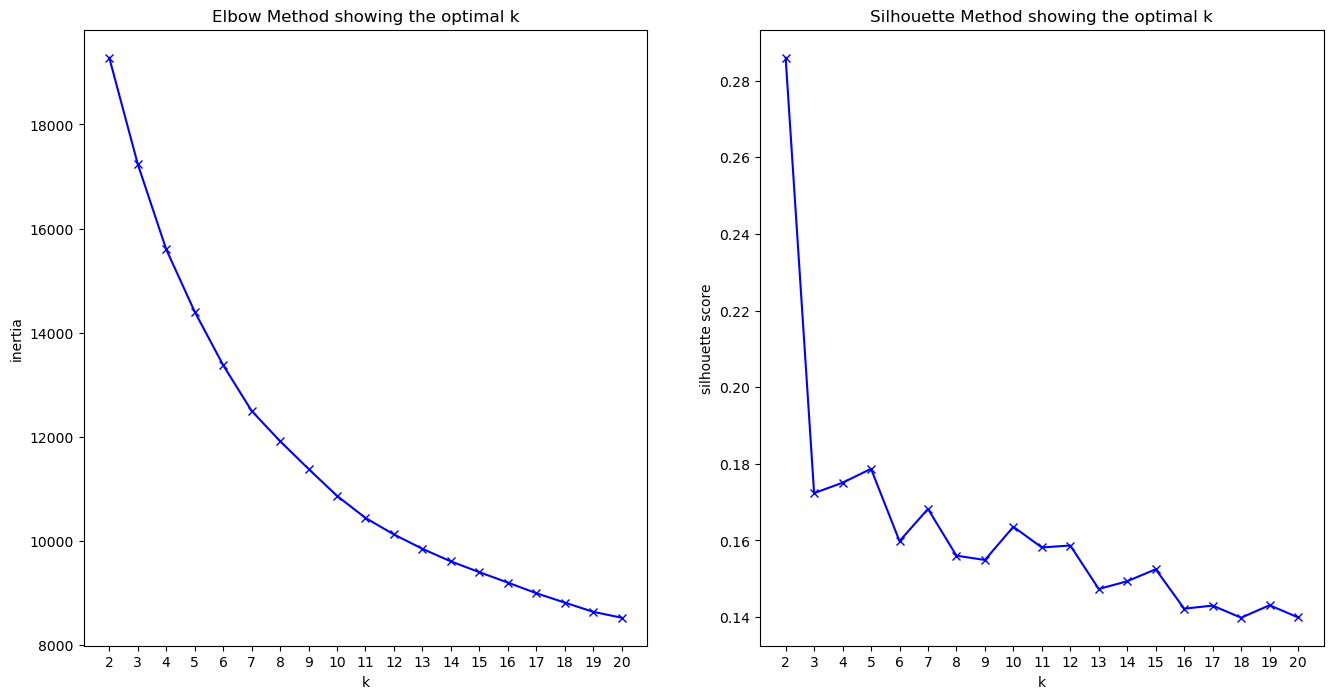

In [167]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

## Loading the best model

In [168]:
import json
import random
import pprint

import pickle
from matplotlib import pyplot

In [169]:
df_scaled_df = X_scaled_df.copy()

In [170]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [171]:
# Based on the low inertia, I think the best model is the 20th one
best_model = load("kmeans_6.pickle")

Initialization complete
Iteration 0, inertia 17429.227138973183.
Iteration 1, inertia 14457.256522770333.
Iteration 2, inertia 14159.483849362634.
Iteration 3, inertia 14002.354963388329.
Iteration 4, inertia 13901.144900087023.
Iteration 5, inertia 13799.57178546149.
Iteration 6, inertia 13705.199741309058.
Iteration 7, inertia 13644.356328030777.
Iteration 8, inertia 13605.066492662296.
Iteration 9, inertia 13578.436459257406.
Iteration 10, inertia 13557.64690520692.
Iteration 11, inertia 13542.316739696536.
Iteration 12, inertia 13527.685851020145.
Iteration 13, inertia 13518.070758173366.
Iteration 14, inertia 13510.271668492403.
Iteration 15, inertia 13506.119693530554.
Iteration 16, inertia 13499.792211167376.
Iteration 17, inertia 13491.190287173831.
Iteration 18, inertia 13484.874313254211.
Iteration 19, inertia 13479.033477226636.
Iteration 20, inertia 13474.234805466374.
Iteration 21, inertia 13471.72653703116.
Iteration 22, inertia 13470.598535283241.
Iteration 23, inertia 1

/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=1234, verbose=1)

In [172]:
df_scaled_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.302034,-0.169863,0.383774,-0.799619,-0.256258,0.750466,-0.532287,2.700338,0.322851
1,-0.836279,0.480428,0.605137,-0.431142,-0.192846,0.694716,-0.504552,-1.020407,-0.056418
2,-0.805227,0.803014,0.405910,-0.799606,-1.009588,0.911913,-0.278589,-0.080480,0.808317
3,0.369175,0.603318,0.689993,-0.799571,-0.683018,0.781931,-0.552681,0.890899,1.521343
4,-0.344194,0.096398,0.564554,-0.799619,0.498340,0.949945,-0.436844,-1.210278,0.489730


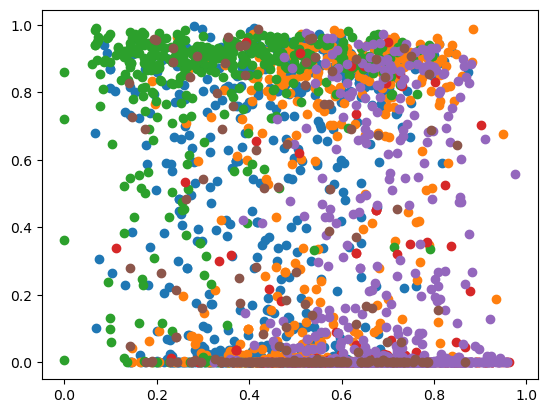

In [173]:
# assign a cluster to each example
labels = best_model.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_num.to_numpy()[row_ix, 1], df_num.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [174]:
clusters = best_model.predict(df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    691
1    540
2    391
3    266
4    827
5    178
dtype: int64

In [175]:
best_model.inertia_

13377.053008179624

In [176]:
scaler = load("scaler.pickle")
scaler

StandardScaler()

In [177]:
df_all["KMeans_6"] = clusters
#df_all["cluster"] = clusters
#df_all

In [178]:
df_all.to_csv("clustered_songs_df.csv")

In [185]:
df_all.head()

,index,artist,song,id,uri,href,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,hot,KMeans_6
0,0,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://open.spotify.com/track/59uQI0PADDKeE6U...,0.4590,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518,1,0
1,1,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,0.0521,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418,1,4
2,2,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://open.spotify.com/track/0yLdNVWF3Srea0u...,0.0632,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,0.646,1,4
3,3,Eslabon Armado X Peso Pluma,Ella Baila Sola,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://open.spotify.com/track/3dnP0JxCgygwQH9...,0.4830,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,0.834,1,4
4,4,Grupo Frontera X Bad Bunny,Un x100to,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.2280,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,0.562,1,4


In [188]:
df_all[(df_all['hot']==1) & (df_all['KMeans_6'] == 0)].sample(3)[['artist','song','href']]

,artist,song,href
37,SZA,Snooze,https://open.spotify.com/track/4iZ4pt7kvcaH6Yo...
0,Morgan Wallen,Last Night,https://open.spotify.com/track/59uQI0PADDKeE6U...
68,Morgan Wallen Featuring ERNEST,Cowgirls,https://open.spotify.com/track/7fveJ3pk1eSfxBd...


In [184]:
display(df_all['song'][df_all['KMeans_6'] == 0].sample(3))#.split('    ')[1].split("\n")[0])

1420    Gets Noisy aka One Day A Week
651                 This Is My Sermon
407                            Side B
Name: song, dtype: object

In [189]:
with open("scaler.pickle", "rb") as f: 
        scaler = pickle.load(f) 
with open("kmeans_6.pickle", "rb") as f: 
        scaler = pickle.load(f)

In [190]:
hot_songs = pd.read_csv("top_100.csv")

In [191]:
hot_songs

,Unnamed: 0,chart_no,song,artist
0,0,1,Last Night,Morgan Wallen
1,1,2,Kill Bill,SZA
2,2,3,Flowers,Miley Cyrus
3,3,4,Ella Baila Sola,Eslabon Armado X Peso Pluma
4,4,5,Un x100to,Grupo Frontera X Bad Bunny
...,...,...,...,...
95,95,96,It Matters To Her,Scotty McCreery
96,96,97,Like Crazy,Jimin
97,97,98,All Of The Girls You Loved Before,Taylor Swift
98,98,99,5 Leaf Clover,Luke Combs


In [192]:
hot_songs.drop(['Unnamed: 0', 'chart_no'], axis = 1, inplace= True)

## Song recommender

In [363]:
# Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret_id))

# Define function to get song features
def get_song_features(track_id):
    '''
    This function takes in a song ID and returns a dictionary containing audio features for the song.
    '''
    feature_list = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
    track_features = {}
    features = sp.audio_features(track_id)[0]
    for feature in feature_list:
        track_features[feature] = features[feature]
    return track_features


# Define function to search for user song
def user_search():
    song_name = input("Please enter a song title: ")
    artist_name = input("Please enter a song artist: ")

    # Searching for track_id of input-song
    query_string = "tracks:" + song_name + "artist:" + artist_name
    results = sp.search(q=query_string, limit=5)
    num_results = len(results['tracks']['items'])

    if num_results == 0:
        print("No results found. Please try again.")
        return

    print("Please select the right song..")

    for i in range(num_results):
        song = results['tracks']['items'][i]
        print(f"{i}. {song['name']} by {song['artists'][0]['name']}")

    # Let the user select right song
    while True:
        try:
            user_selection = int(input("Please select one number: "))
            if user_selection < 0 or user_selection >= num_results:
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    track_id = results['tracks']['items'][user_selection]['id']

    # Getting the Spotify audio features of the song
    input_dict = get_song_features(track_id)

    # Selecting necessary features and standard scaling 
    feature_list = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
    input_list = [input_dict[feature] for feature in feature_list]
    input_array = np.array(input_list).reshape(1,-1)

    #scaler = StandardScaler()
    input_array_scaled = scaler.transform(input_array)

    data_dict = {}
    for feat in feature_list:
        data_dict[feat] = [input_dict[feat]]
    
    # Getting cluster label for user song
    input_df = pd.DataFrame(data_dict) #, index=None,columns=feature_list)
    cluster_label = best_model.predict(input_df)[0]
    
                      
    from IPython.display import HTML

    if track_id in list(df_all[df_all['hot']==1]['id'].values):
        # Provide a recommendation of songs which are hot and belongs to the same cluster as the user song
        hot_songs = df_all[(df_all['hot']==1) & (df_all['KMeans_6'] == cluster_label)].sample(5)[['artist','song','href']]
        hot_songs.reset_index(drop=True, inplace=True)
        for i in range(len(hot_songs)):
            print(f"{i+1}. {hot_songs.iloc[i]['song']} by {hot_songs.iloc[i]['artist']}, ")
            display(HTML(f"<a href='{hot_songs.iloc[i]['href']}' target='_blank'>Click here to listen</a>"))
            print()
    else:
        # Provide a recommendation of songs which are not hot and belongs to the same cluster as the user cluster
        songs = df_all[(df_all['KMeans_6'] == cluster_label) & (df_all['hot'] == 2)].sample(5)[['artist','song','href']]
        #songs = songs.sort_values(by=['popularity'], ascending=False)
        songs.reset_index(drop=True, inplace=True)
        for i in range(len(songs)):
            print(f"{i+1}. {songs.iloc[i]['song']} by {songs.iloc[i]['artist']}, ")
            display(HTML(f"<a href='{songs.iloc[i]['href']}' target='_blank'>Click here to listen</a>"))
            print()


In [372]:
user_search()

Please enter a song title: Kill Bill
Please enter a song artist: SZA
Please select the right song..
0. Kill Bill by SZA
1. Kill Bill (feat. Doja Cat) by SZA
2. Kill Bill - Acoustic by SZA
3. Kill Bill - Sped Up Version by SZA
4. Kill Bill - Vocals by SZA
Please select one number: 0
1. Need A Favor by Jelly Roll, 


/Users/ugoejiofor/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(



2. Chemical by Post Malone, 



3. Cowgirls by Morgan Wallen Featuring ERNEST, 



4. One Thing At A Time by Morgan Wallen, 



5. Wild As Her by Corey Kent, 
